#optimization problem 
http://tutorial.math.lamar.edu/Classes/CalcI/Optimization.aspx



#1.Define the optimization problem by Mathematic equations.

#2. one variable  method: using constraint to replace one variable 

#2.1 run tensorflow gradient descent to answer the question.

#2.2 run genetic algorithm answer the question.


We have a piece of cardboard that is 14 inches by 10 inches and we’re going to cut out the corners as shown below and fold up the sides to form a box, also shown below. Determine the height of the box that will give a maximum volume.

>![img](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image006.gif)

>Let’s let the height of the box be $h$ . So, the width/length of the corners being cut out is also h and so the vertical side will have a “new” height of $10−2h$ and the horizontal side will have a “new” width of $14−2h$. 

>![img](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image007.png)

>In this example, for the first time, we’ve run into a problem where the constraint doesn’t really have an equation. The constraint is simply the size of the piece of cardboard and has already been factored into the figure above. This will happen on occasion and so don’t get excited about it when it does. This just means that we have one less equation to worry about. In this case we want to maximize the volume. Here is the volume, in terms of $h$ and its first derivative.
>>$V(h)=h(14−2h)(10−2h)=140h−48h^2+4h^3 $<br>

>Setting the first derivative equal to zero and solving gives the following two critical points,

>>$h = \frac{{12 \pm \sqrt {39} }}{3} = 1.9183,\,\,\,\,6.0817$

>We now have an apparent problem. We have two critical points and we’ll need to determine which one is the value we need. The fact that we have two critical points means that neither the first derivative test or the second derivative test can be used here as they both require a single critical point. This isn’t a real problem however. Go back to the figure at the start of the solution and notice that we can quite easily find limits on h. The smallest h can be is h=0 even though this doesn’t make much sense as we won’t get a box in this case. Also, from the 10 inch side we can see that the largest h can be is $h=5$ although again, this doesn’t make much sense physically.

>So, knowing that whatever $h$ is it must be in the range $0≤h≤5$  we can see that the second critical point is outside this range and so the only critical point that we need to worry about is 1.9183.

>Finally, since the volume is defined and continuous on $0≤h≤5$ all we need to do is plug in the critical points and endpoints into the volume to determine which gives the largest volume. Here are those function evaluations.
>>$
V\left( 0 \right) = 0\hspace{0.25in}\hspace{0.25in}V\left( {1.9183} \right) = 120.1644\hspace{0.25in}\hspace{0.25in}V\left( 5 \right) = 0
$

>So, if we take $h=1.9183$ we get a maximum volume.

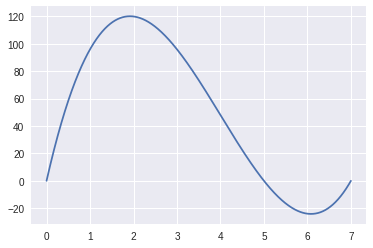

In [8]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
x=np.arange(0,7,0.0001)
y=x*(14-2*x)*(10-2*x)

plt.plot(x,y)
plt.show()

In [9]:
x = tf.Variable(tf.random_uniform([1], 0, 2.0))
print(x)

<tf.Variable 'Variable_2:0' shape=(1,) dtype=float32_ref>


In [0]:
# 1.4 Build training graph.
loss = tf.reduce_mean(x*(14-2*x)*(10-2*x))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.01)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.


In [11]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([x]))

[array([0.03860998], dtype=float32)]


In [12]:
# 1.7 Perform training.
for step in range(1000):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    # if step % 20 == 0:
    #    print(step, sess.run([W, b]))

print(sess.run([x]))

[array([1.9183339], dtype=float32)]


In [13]:
h = 1.9183
x = 14-2*h
x

10.1634

In [14]:
y = 10-2*h
y

6.1634

In [15]:
x*y*h

120.164421285948

In [16]:
import numpy as np

import multiprocessing
from collections import OrderedDict
import os
import time


def eval_iter(arg_lst, l_lst):
    for c_i, args in enumerate(arg_lst):
        yield c_i, args, l_lst


def eval_func(c_i, args, l_lst):
    assert len(args) == 3
    x = args[0]
    y = args[1]
    z = args[2]
    res = 1000-(x*y*z)
    #res = (200/(y+3.5)-2)*y
    print(f"Eval {x}, {y}, {z}: {res}")
    l_lst[c_i] = res


if __name__ == '__main__':

    generation_num = 100
    child_num = 5

    space = OrderedDict((
        ('x', (10., 11.)),
        ('y', (5., 7.)),
        ('z', (0., 2.))
    ))

    params = OrderedDict([(nm, []) for nm in space.keys()])
    for nm, v_range in space.items():
        params[nm] = np.random.uniform(v_range[0], v_range[1], size=child_num)

    arg_list = []
    for c_n in range(child_num):
        arg_list.append([val[c_n] for val in params.values()])

    manager = multiprocessing.Manager()
    loss_lst = manager.list([np.inf for i in range(child_num)])

    for r_n in range(generation_num):
        with multiprocessing.Pool(os.cpu_count()) as pool:
            pool.starmap(eval_func, eval_iter(arg_list, loss_lst))

        fittest_idx = int(np.argmin(loss_lst))
        base_args = arg_list[fittest_idx]
        print(f"Best {base_args}\n")

        # mutate offspring from fittest individual
        params = OrderedDict([(nm, []) for nm in space.keys()])
        for s_i, (nm, v_range) in enumerate(space.items()):
            std = (v_range[1] - v_range[0]) / 2
            noise = np.random.normal(0, std, size=child_num)
            new_param = base_args[s_i] + noise
            params[nm] = np.clip(new_param, v_range[0], v_range[1])

        arg_list = []
        for c_n in range(child_num):
            arg_list.append([val[c_n] for val in params.values()])

        loss_lst = manager.list([np.inf for i in range(child_num)])

Eval 10.501949779395307, 6.536321762210745, 0.42169374093773526: 971.053203025672
Eval 10.738082100139913, 6.5153523855429105, 0.9167400007169761: 935.8626796162976
Eval 10.402236084160863, 5.951727582597231, 1.1954888226362455: 925.9857622369024
Eval 10.981939229083629, 6.380730064409452, 0.6577939194354028: 953.9065449487041
Eval 10.414752688241503, 6.444724791851132, 1.6827924220041792: 887.0506110855993
Best [10.414752688241503, 6.444724791851132, 1.6827924220041792]

Eval 10.793316575316318, 5.706629172163097, 2.0: 876.8130895338168
Eval 10.295566635929962, 6.181330456002809, 1.5588359762316282: 900.7952114321414
Eval 10.479257328660518, 7.0, 0.09581674760784664: 992.9713815179545
Eval 10.437981901800507, 5.996354849651705, 2.0: 874.8203132051236
Eval 10.326373081253093, 5.08593165304125, 2.0: 894.9615445698836
Best [10.437981901800507, 5.996354849651705, 2.0]

Eval 10.921172323856444, 6.260180192603847, 1.8354967455006928: 874.509828527488
Eval 11.0, 5.850683630259064, 1.24537268